# Comparing the power statistics of different pokemon types

Power statistics here refer to:
- Hit points
- Attack
- Defense
- Special Defense
- Special Attack
- Speed

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from math import pi
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import scikit_posthocs as sp 

from src.utils import save_fig
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None) 

In [3]:
img_dir = "../images"

## Getting the data

According to [Pokeapi](https://pokeapi.co/), where we obtain our data from, the data for sword and shield (gen6) might be inaccurate. As such, we will just use generation 1 to 5 for this analysis

In [4]:
# generated from pokemon_scraper.py
df_gen1 = pd.read_csv("../data/df_pokemon_gen_1.csv")
df_gen2 = pd.read_csv("../data/df_pokemon_gen_2.csv")
df_gen3 = pd.read_csv("../data/df_pokemon_gen_3.csv")
df_gen4 = pd.read_csv("../data/df_pokemon_gen_4.csv")
df_gen5 = pd.read_csv("../data/df_pokemon_gen_5.csv")

In [5]:
df_gen1.head()

name  hp  attack  defense  special_attack  special_defense  speed  \
0   bulbasaur  45      49       49              65               65     45   
1  charmander  39      52       43              60               50     65   
2    squirtle  44      48       65              50               64     43   
3    caterpie  45      30       35              20               20     45   
4      weedle  40      35       30              20               20     50   

           types  base_experience  base_happiness  capture_rate  height  \
0  grass, poison               64              50            45       7   
1           fire               62              50            45       6   
2          water               63              50            45       5   
3            bug               39              50           255       3   
4    bug, poison               39              70           255       3   

   weight  \
0      69   
1      85   
2      90   
3      29   
4      32   

                                                                         image_url  
0   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png  
1   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png  
2   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/7.png  
3  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/10.png  
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/13.png

In [6]:
df_gen2.head()

name  hp  attack  defense  special_attack  special_defense  speed  \
0  chikorita  45      49       65              49               65     45   
1  cyndaquil  39      52       43              60               50     65   
2   totodile  50      65       64              44               48     43   
3    sentret  35      46       34              35               45     20   
4   hoothoot  60      30       30              36               56     50   

            types  base_experience  base_happiness  capture_rate  height  \
0           grass               64              70            45       9   
1            fire               62              70            45       5   
2           water               63              70            45       6   
3          normal               43              70           255       8   
4  normal, flying               52              50           255       7   

   weight  \
0      64   
1      79   
2      95   
3      60   
4     212   

                                                                          image_url  
0  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/152.png  
1  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/155.png  
2  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/158.png  
3  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/161.png  
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/163.png

In [7]:
df_gen3.head()

name  hp  attack  defense  special_attack  special_defense  speed  \
0    treecko  40      45       35              65               55     70   
1    torchic  45      60       40              70               50     45   
2     mudkip  50      70       50              50               50     40   
3  poochyena  35      55       35              30               30     35   
4  zigzagoon  38      30       41              30               41     60   

    types  base_experience  base_happiness  capture_rate  height  weight  \
0   grass               62              50            45       5      50   
1    fire               62              50            45       4      25   
2   water               62              50            45       4      76   
3    dark               56              70           255       5     136   
4  normal               56              50           255       4     175   

                                                                          image_url  
0  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/252.png  
1  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/255.png  
2  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/258.png  
3  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/261.png  
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/263.png

In [8]:
df_gen4.head()

name  hp  attack  defense  special_attack  special_defense  speed  \
0   turtwig  55      68       64              45               55     31   
1  chimchar  44      58       44              58               44     61   
2    piplup  53      51       53              61               56     40   
3    starly  40      55       30              30               30     60   
4    bidoof  59      45       40              35               40     31   

            types  base_experience  base_happiness  capture_rate  height  \
0           grass               64              70            45       4   
1            fire               62              70            45       5   
2           water               63              70            45       4   
3  normal, flying               49              70           255       3   
4          normal               50              70           255       5   

   weight  \
0     102   
1      62   
2      52   
3      20   
4     200   

                                                                          image_url  
0  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/387.png  
1  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/390.png  
2  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/393.png  
3  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/396.png  
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/399.png

In [9]:
df_gen5.head()

name   hp  attack  defense  special_attack  special_defense  speed  \
0   victini  100     100      100             100              100    100   
1     snivy   45      45       55              45               55     63   
2     tepig   65      63       45              45               45     45   
3  oshawott   55      55       45              63               45     45   
4    patrat   45      55       39              35               39     42   

           types  base_experience  base_happiness  capture_rate  height  \
0  psychic, fire              300             100             3       4   
1          grass               62              70            45       6   
2           fire               62              70            45       5   
3          water               62              70            45       5   
4         normal               51              70           255       5   

   weight  \
0      40   
1      81   
2      99   
3      59   
4     116   

                                                                          image_url  
0  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/494.png  
1  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/495.png  
2  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/498.png  
3  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/501.png  
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/504.png

Let's combine the pokemons from these 3 generations to form the full dataset

In [10]:
df = pd.concat([df_gen1, df_gen2], ignore_index=True)
df = pd.concat([df, df_gen3], ignore_index=True)
df = pd.concat([df, df_gen4], ignore_index=True)
df = pd.concat([df, df_gen5], ignore_index=True)

## Preprocessing

- We add more features to the main dataframe ``df``.
- Feature 1: We will add a new column called ``n_types`` to represent the number of types a pokemon belongs to
- Feature 2: We will add a ``sum_features`` to represent hp + attack + defense + special_attack + special_defense + speed
- Some pokemons belong to two different types. We can expand the number of row for that pokemon so that each type is represented. We will create a separate dataframe ``df_multi`` from the main one (``df``)


In [11]:
# feature 1: count of number of types 
df = df.assign(n_types=lambda df_: [len(x.split(",")) for x in df_.types])

In [12]:
# feature 2: create sum_features column
df = df.assign(sum_features=lambda df_: df_.hp + df_.attack + df_.defense + df_.special_attack + df_.special_defense + df_.speed)

In [13]:
# Split the pokemon into multiple rows if there is more than one type
df_multi = (df.set_index(df.columns.drop('types',1).tolist())
      .types.str.split(', ', expand=True)
      .stack()
      .reset_index()
      .rename(columns={0:'types'})
      .loc[:, df.columns])

In [14]:
df_multi.head()

name  hp  attack  defense  special_attack  special_defense  speed  \
0   bulbasaur  45      49       49              65               65     45   
1   bulbasaur  45      49       49              65               65     45   
2  charmander  39      52       43              60               50     65   
3    squirtle  44      48       65              50               64     43   
4    caterpie  45      30       35              20               20     45   

    types  base_experience  base_happiness  capture_rate  height  weight  \
0   grass               64              50            45       7      69   
1  poison               64              50            45       7      69   
2    fire               62              50            45       6      85   
3   water               63              50            45       5      90   
4     bug               39              50           255       3      29   

                                                                         image_url  \
0   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png   
1   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png   
2   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png   
3   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/7.png   
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/10.png   

   n_types  sum_features  
0        2           318  
1        2           318  
2        1           309  
3        1           314  
4        1           195

In [15]:
# get the unique categories
list_all = df.types.str.split(',').to_numpy()
cat_types = np.unique(sum(list_all, []))
cat_types = [x.strip() for x in list(cat_types)]
print(f'There are {len(cat_types)} different types')

There are 34 different types


In [16]:
# create dummy columns 
type_dummy = df['types'].str.get_dummies(sep=', ')

# join with main dataframe
df = pd.concat([df, type_dummy], axis=1)

In [17]:
df.head()

name  hp  attack  defense  special_attack  special_defense  speed  \
0   bulbasaur  45      49       49              65               65     45   
1  charmander  39      52       43              60               50     65   
2    squirtle  44      48       65              50               64     43   
3    caterpie  45      30       35              20               20     45   
4      weedle  40      35       30              20               20     50   

           types  base_experience  base_happiness  capture_rate  height  \
0  grass, poison               64              50            45       7   
1           fire               62              50            45       6   
2          water               63              50            45       5   
3            bug               39              50           255       3   
4    bug, poison               39              70           255       3   

   weight  \
0      69   
1      85   
2      90   
3      29   
4      32   

                                                                         image_url  \
0   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png   
1   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png   
2   https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/7.png   
3  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/10.png   
4  https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/13.png   

   n_types  sum_features  bug  dark  dragon  electric  fairy  fighting  fire  \
0        2           318    0     0       0         0      0         0     0   
1        1           309    0     0       0         0      0         0     1   
2        1           314    0     0       0         0      0         0     0   
3        1           195    1     0       0         0      0         0     0   
4        2           195    1     0       0         0      0         0     0   

   flying  ghost  grass  ground  ice  normal  poison  psychic  rock  steel  \
0       0      0      1       0    0       0       1        0     0      0   
1       0      0      0       0    0       0       0        0     0      0   
2       0      0      0       0    0       0       0        0     0      0   
3       0      0      0       0    0       0       0        0     0      0   
4       0      0      0       0    0       0       1        0     0      0   

   water  
0      0  
1      0  
2      1  
3      0  
4      0

The list of pokemons includes legendary pokemons. Legendary pokemons are rare and powerful pokemons.
- In generation 1, the legendary poekmons are Articuno, Zapdos, Moltres and Mewtwo.
- In generation 2, the legendary pokemons are Lugia, Ho-Oh, Entei, Suicune and Raikou.
- In generation 3, the legendary pokemons are Regirock, Regice, Registeel, Latias, Latios, Groudon, Kyogre and Rayquaza
- In generation 4, the legendary pokemons are Dialga, Palkia, Giratina, Uxie, Mesprit, Azelf, Cresselia, Heatran, Regigigas
- In generation 5, the legendary pokemons are Cobalion, Terrakion, Virizion, Tornadus, Landorus, Reshiram, Zekrom, Kyurem

For a more accurate representation of the types, we shall exclude these legendary pokemons in our analysis

![arti](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/144.png)
![zapdos](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/145.png)
![moltres](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/146.png)
![mewtwo](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/150.png)
![raikou](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/243.png)
![entei](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/244.png)
![suicune](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/245.png)
![lugia](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/249.png)
![ho-oh](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/250.png)
![regirock](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/377.png)
![regice](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/378.png)
![registeel](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/379.png)
![latias](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/380.png)
![latios](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/381.png)
![kyogre](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/382.png)
![groudon](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/383.png)
![rayquaza](https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/384.png)

In [18]:
# remove legendary pokemons from analysis
legend_poke = ['articuno', 'zapdos', 'moltres', 'mewtwo', 
               'lugia', 'ho-oh', 'entei', 'suicune', 'raikou', 
               'regirock', 'regice', 'registeel', 'latias', 'latios', 'groudon', 'kyogre', 'rayquaza',
               'dialga', 'palkia', 'giratina', 'uxie', 'mesprit', 'azelf', 'cresselia', 'heatran', 'regigigas',
               'cobalion', 'terrakion', 'virizion', 'tornadus', 'landorus', 'reshiram', 'zekrom', 'kyurem']

df_multi_no_legend = df_multi[~df_multi.name.isin(legend_poke)]
df_no_legend = df[~df.name.isin(legend_poke)]

# Creating Colour Palette

We will create a colour palette for each type. 

In [19]:
# get all categories of types
type_category = df_multi_no_legend.groupby('types')['types'].count().index.tolist()

In [20]:
colors = ['#a8b820', '#705848', '#7038f8', '#f8d030', '#f0b6bc', '#c03028', '#f08030', '#a890f0', '#705898', '#78c850', 
            '#e0c068', '#98d8d8', '#a8a878', '#a040a0', '#f85888', '#b8a038', '#b8b8d0', '#6890f0']

In [21]:
sns.color_palette(colors)

[(0.6588235294117647, 0.7215686274509804, 0.12549019607843137),
 (0.4392156862745098, 0.34509803921568627, 0.2823529411764706),
 (0.4392156862745098, 0.2196078431372549, 0.9725490196078431),
 (0.9725490196078431, 0.8156862745098039, 0.18823529411764706),
 (0.9411764705882353, 0.7137254901960784, 0.7372549019607844),
 (0.7529411764705882, 0.18823529411764706, 0.1568627450980392),
 (0.9411764705882353, 0.5019607843137255, 0.18823529411764706),
 (0.6588235294117647, 0.5647058823529412, 0.9411764705882353),
 (0.4392156862745098, 0.34509803921568627, 0.596078431372549),
 (0.47058823529411764, 0.7843137254901961, 0.3137254901960784),
 (0.8784313725490196, 0.7529411764705882, 0.40784313725490196),
 (0.596078431372549, 0.8470588235294118, 0.8470588235294118),
 (0.6588235294117647, 0.6588235294117647, 0.47058823529411764),
 (0.6274509803921569, 0.25098039215686274, 0.6274509803921569),
 (0.9725490196078431, 0.34509803921568627, 0.5333333333333333),
 (0.7215686274509804, 0.6274509803921569, 0.2196078431372549),
 (0.7215686274509804, 0.7215686274509804, 0.8156862745098039),
 (0.40784313725490196, 0.5647058823529412, 0.9411764705882353)]

In [22]:
my_colors = ListedColormap(sns.color_palette(colors))

In [23]:
# create colours dictionary
colors_dict = dict(zip(type_category, colors))

# Overall Distribution

Saving figure overall_distribution


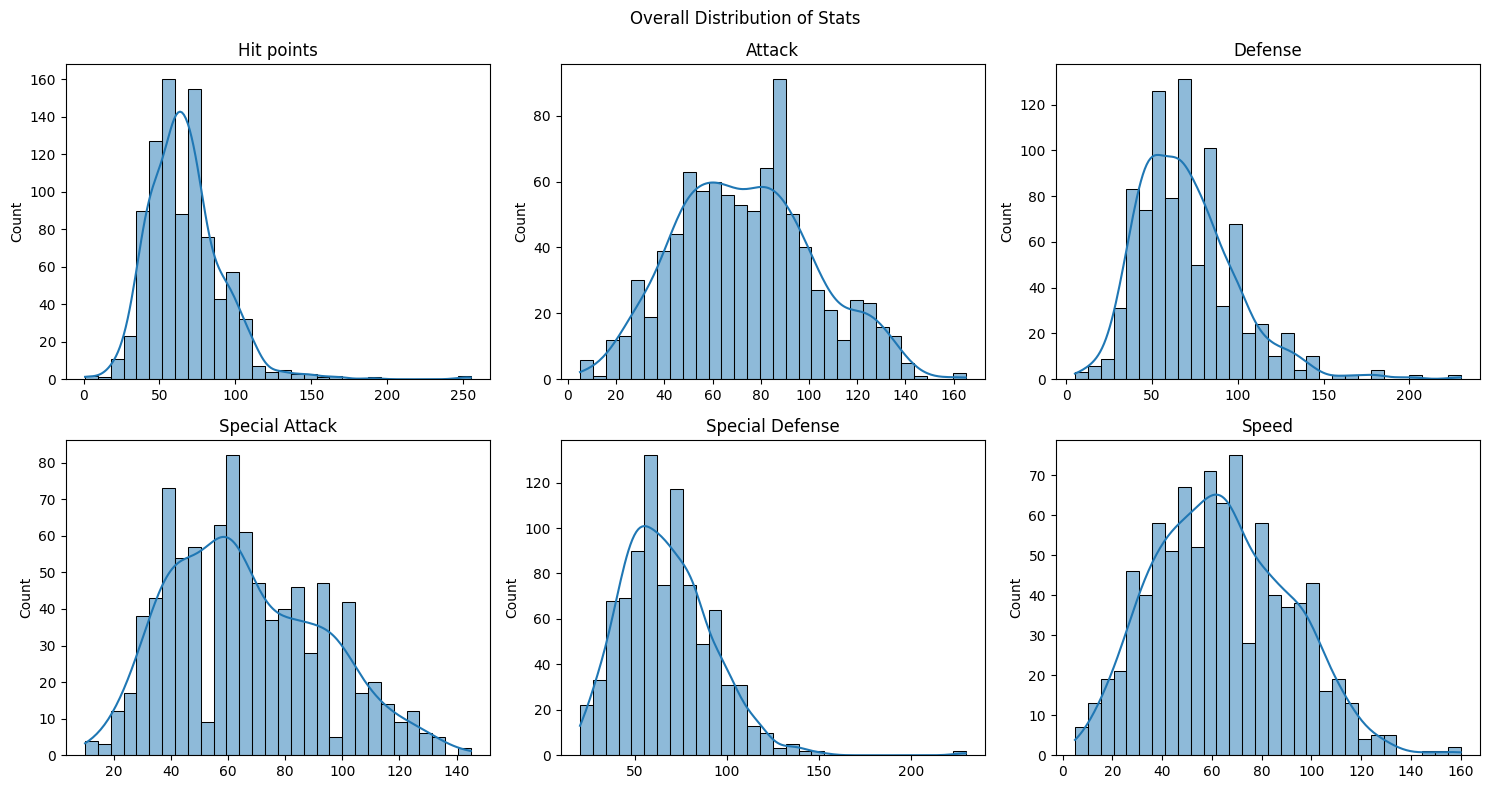

In [27]:
# Overall distribution of factors

fig, axes = plt.subplots(2,3, figsize=(15,8))
fig.suptitle("Overall Distribution of Stats")
sns.histplot(ax=axes[0,0], data=df_multi_no_legend, x='hp', bins=30, kde=True)
axes[0,0].set_title("Hit points")
axes[0,0].set(xlabel=None)

sns.histplot(ax=axes[0,1], data=df_multi_no_legend, x='attack', bins=30, kde=True)
axes[0,1].set_title("Attack")
axes[0,1].set(xlabel=None)

sns.histplot(ax=axes[0,2], data=df_multi_no_legend, x='defense', bins=30, kde=True)
axes[0,2].set_title("Defense")
axes[0,2].set(xlabel=None)

sns.histplot(ax=axes[1,0], data=df_multi_no_legend, x='special_attack', bins=30, kde=True)
axes[1,0].set_title("Special Attack")
axes[1,0].set(xlabel=None)

sns.histplot(ax=axes[1,1], data=df_multi_no_legend, x='special_defense', bins=30, kde=True)
axes[1,1].set_title("Special Defense")
axes[1,1].set(xlabel=None)

sns.histplot(ax=axes[1,2], data=df_multi_no_legend, x='speed', bins=30, kde=True)
axes[1,2].set_title("Speed")
axes[1,2].set(xlabel=None)

save_fig("overall_distribution", img_dir)
plt.show()



Overall, the distribution for attack and special attack are quite normally distributed. On the other hand, the distribution of hit points, defense, special defense and speed are right skewed.

Let's look into the characteristics of the different types

# Distribution by Types

Saving figure types_distribution


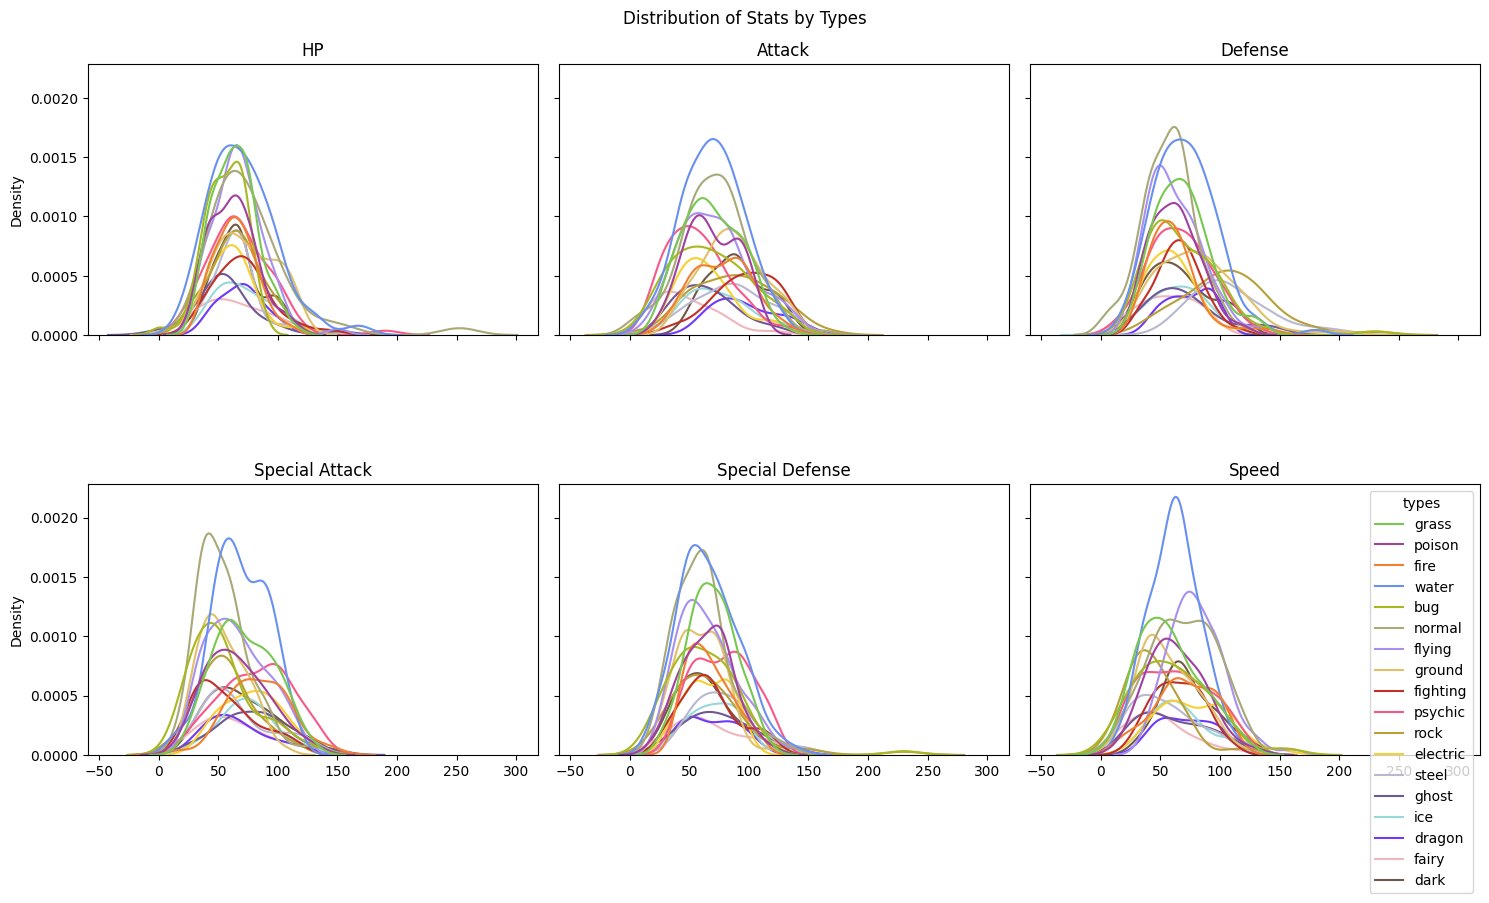

In [28]:
fig, axes = plt.subplots(2,3, figsize=(15,8), sharey=True, sharex=True)
fig.suptitle("Distribution of Stats by Types")
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='hp', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("HP")
axes[0,0].set(xlabel=None)

sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='attack', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("Attack")
axes[0,1].set(xlabel=None)

sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='defense', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("Defense")
axes[0,2].set(xlabel=None)

sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='special_attack', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("Special Attack")
axes[1,0].set(xlabel=None)

sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='special_defense', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("Special Defense")
axes[1,1].set(xlabel=None)

sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='speed', hue='types', palette=colors_dict, legend=True)
axes[1,2].set_title("Speed")
axes[1,2].set(xlabel=None)

save_fig("types_distribution", img_dir)
plt.show()

- The distribution for these six factors are quite similar for the different types. As such, it will be quite hard to tell them apart given just these six features.
- We shall look into their kurtosis value next to find out more about the tail distribution. This statistics can help us locate outliers

## Kurtosis

 Kurtosis is a measure that describes the shape of the distribution's tails in relation to its overall shape. Kurtosis describes how much of a probability distribution falls in the tails instead of its center. In a normal distribution, the kurtosis is equal to three. Positive or negative excess kurtosis will then change the shape of the distribution accordingly. Higher kurtosis has a heavier tail. There are three categories of kurtosis 
 - Mesokurtic (kurtosis = 3.0). This is similar to that of a normal distribution
 - Leptokurtic (kurtosis > 3.0). This distribution appears as a curve one with long tails. While a leptokurtic distribution may be skinny in the center, it also features fat tails
 - Platykurtic (kurtosis < 3.0).  This distribution have short tails.

In the ``scipy`` package, we are given an option to set ``fisher=True``. This would subtract 3.0 from the result to give 0.0 for a normally distribution. Since this will be much easier for us to compare values at a glance, we set ``fisher=True``

In [29]:
hp_kurtosis = []
attack_kurtosis = []
defense_kurtosis = []
special_att_kurtosis = []
special_def_kurtosis = []
speed_kurtosis = []

for type_ in type_category:
    type_elem = df_multi_no_legend.query(f"types == '{type_}'")
    hp = type_elem.hp.values
    attack = type_elem.attack.values
    defense = type_elem.defense.values
    special_att = type_elem.special_attack.values
    special_def = type_elem.special_defense.values
    speed = type_elem.speed.values

    hp_kurtosis.append(stats.kurtosis(hp, fisher=True)) # fisher=True --> 3.0 subtracted from result to give 0.0 for a normal distribution
    attack_kurtosis.append(stats.kurtosis(attack, fisher=True))
    defense_kurtosis.append(stats.kurtosis(defense, fisher=True))
    special_att_kurtosis.append(stats.kurtosis(special_att, fisher=True))
    special_def_kurtosis.append(stats.kurtosis(special_def, fisher=True))
    speed_kurtosis.append(stats.kurtosis(speed, fisher=True))


In [30]:
df_kurtosis = pd.DataFrame({'type': type_category,
               'hp': hp_kurtosis,
               'attack': attack_kurtosis,
               'defense': defense_kurtosis,
               'special_att': special_att_kurtosis,
               'special_def': special_def_kurtosis,
               'speed': speed_kurtosis})

We highlight the highest kurtosis value for each factor. Those are the types with heavy tails (outliers)

In [31]:
def color_recommend(value):
    if value > 0: # heavier tails than a normal distribution
        color = 'red'
    else: # short tails
        color = 'green'
    return f'background-color: {color}'

In [28]:
df_kurtosis.style.applymap(color_recommend, subset=['hp', 'attack', 'defense', 'special_att', 'special_def', 'speed'])

- For **HP**, the distribution of psychic and normal have much heavier tails
- For attack, all distributions have similar tail as normal distribution
- For **defense**, the distribution of bug and ice have much heavier tails
- For special attack, all distributions have similar tail as normal distribution
- For **special defense**, the distribution of bug and rock have much heavier tails than normal distribution
- For **speed**, the distribution of rock have much heavier tails than normal distribution


## Radar Distribution

Let's look at the average statistics for each type

In [32]:
radar = (
    df_multi_no_legend.groupby('types').agg(
        avg_hp = ('hp', np.mean),
        avg_attack = ('attack', np.mean),
        avg_defense = ('defense', np.mean),
        avg_special_att = ('special_attack', np.mean),
        avg_special_def = ('special_defense', np.mean),
        avg_speed = ('speed', np.mean)
    )
    #.apply(lambda x: rescale(x))
    .reset_index()
)

In [33]:
def make_spider( row, title, color):

    # number of variable
    categories=list(radar)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([30,60,90,120], ['30', '60', '90', '120'], color="grey", size=7)
    plt.ylim(0,120)

    # Ind1
    values=radar.loc[row].drop('types').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    

Saving figure radar_plot


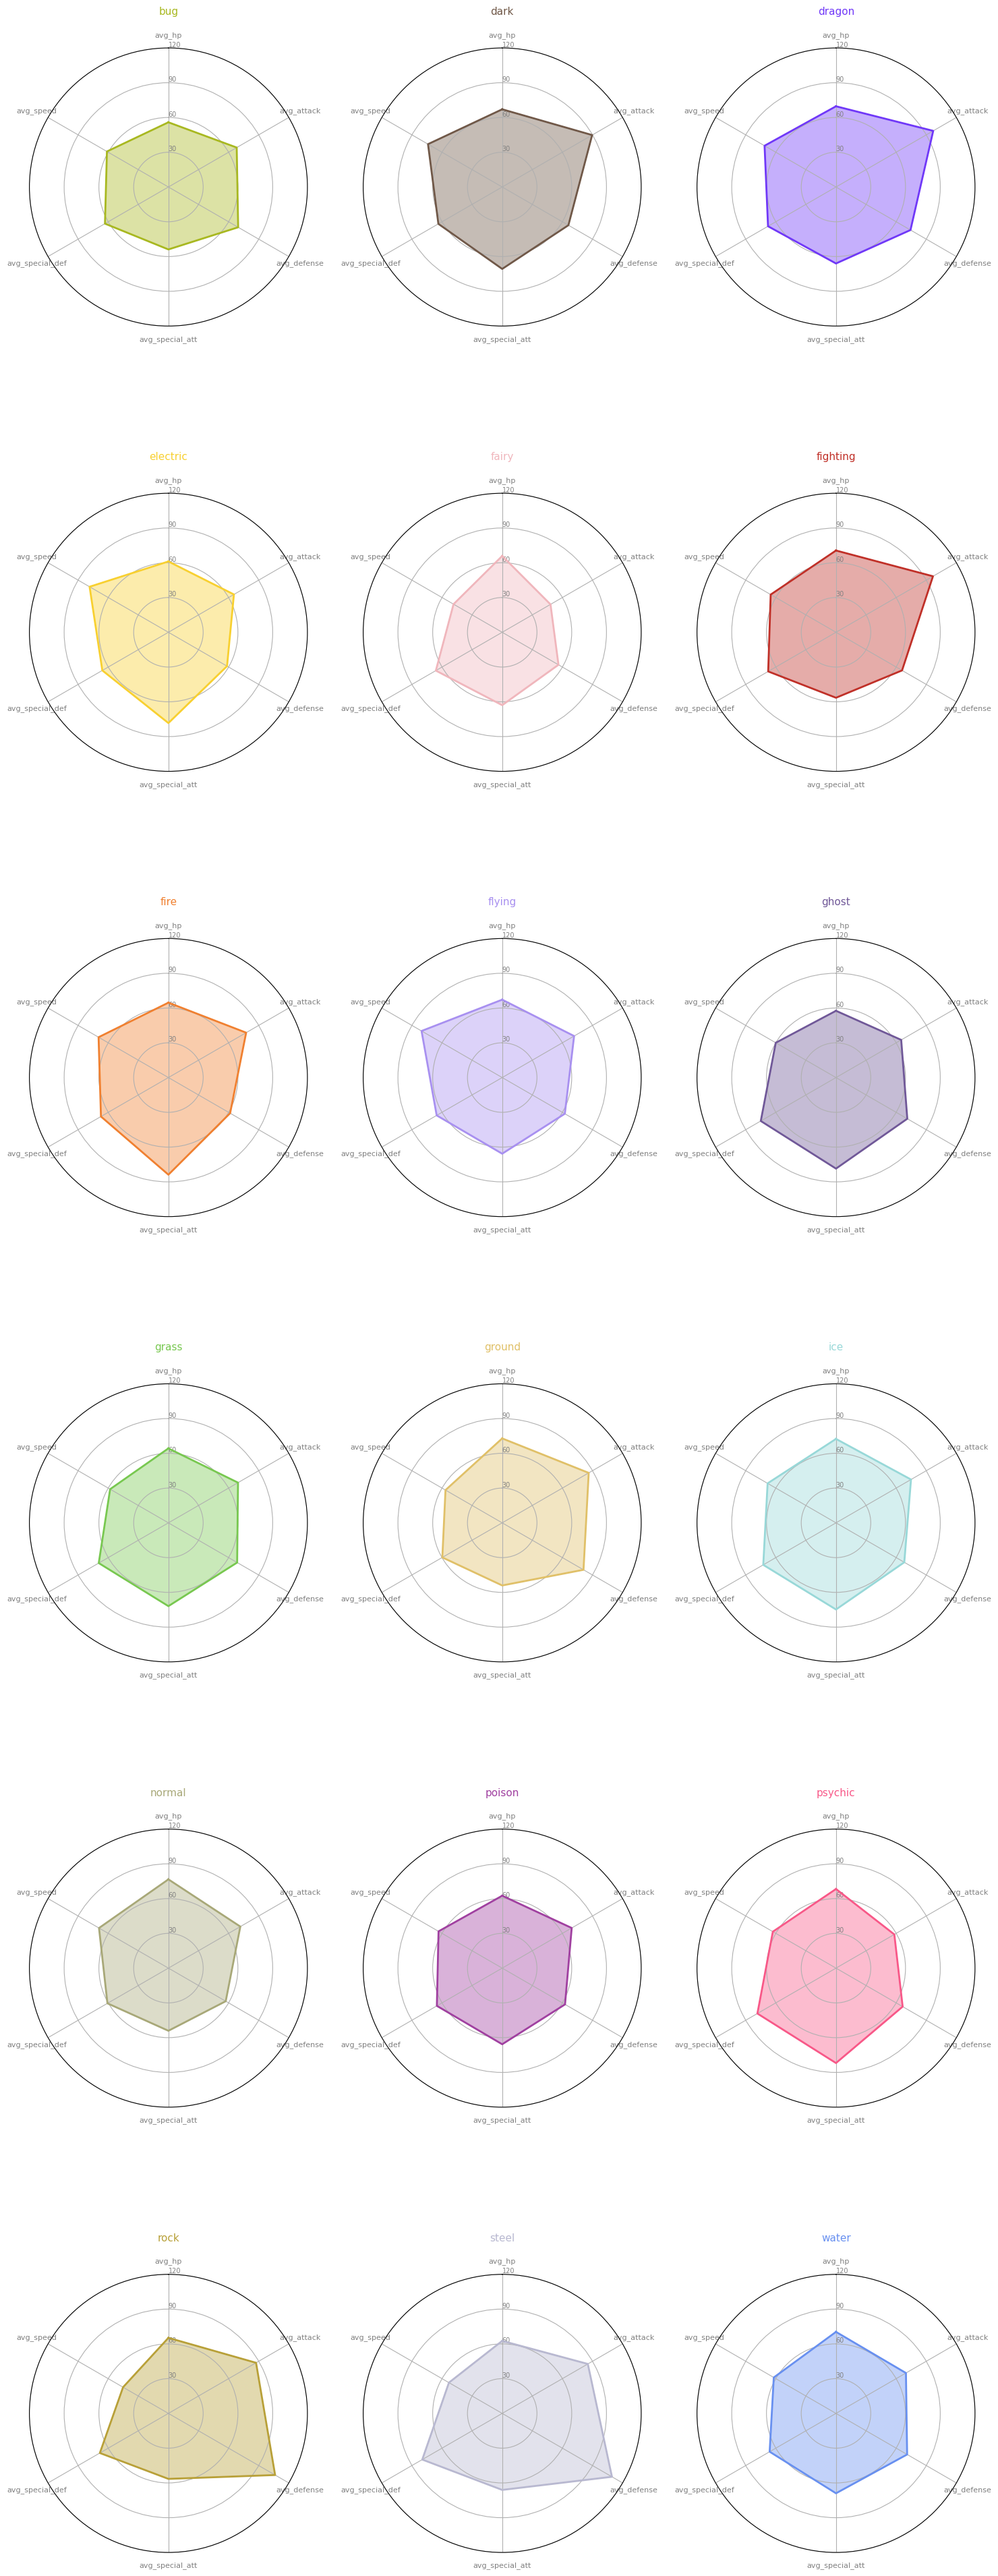

In [34]:
fig = plt.figure(figsize=(15, 40))
for row in range(0, len(radar.index)):
    make_spider( row=row, title=radar['types'][row], color=my_colors(row))
save_fig("radar_plot", img_dir)

- **bug**: all six factors are quite similar.
- **dark**: stronger in attack and special attack
- **dragon**: all six factors are quite similar.
- **electric**: stronger in speed
- **fairy**: stronger in hp, weak in speed
- **fighting**: stronger in attack
- **fire**: stronger in special attack and attack
- **flying**: stronger in speed
- **ghost**: stronger in special attack, weak in hp
- **grass**: all six factors are quite similar.
- **ground**: stronger in defense
- **ice**: all six factors are quite similar.
- **normal**: all six factors are quire similar.
- **poison**: all six factors are quite similar.
- **psychic**: stronger in special attack and special defense
- **rock**: stronger in defense, weak in speed
- **steel**: stronger in defense, weak in speed
- **water**: all six factors are quite similar.


## Are the differences significant?

Here, we want to see if there is significant difference between the types based on the six factors.

### 1. Observations in each group are independent and identically distributed

- Since there is no connection between the observations, the samples are independent. Identically distributed relates to the probability distribution that describes the characteristic you are measuring. One probability distribution should adequately model all values you observe in sample. Since there doesn't seem to be any trends in the data, we assume that the observations are identically distributed.

### 2. Observations in each group are normally distributed

- MANOVA assumes that the response variables are multivariate normally distributed within each group of the factor variable. 
- We will look at the different transformations


In [83]:
# create columns for various transformations - square root, logarithm, boxcox, yeo-johnson, cube root
df_multi_no_legend = df_multi_no_legend.assign(hp_sqrt=lambda df_: np.sqrt(df_.hp),
                                               hp_log=lambda df_: np.log(df_.hp),
                                               hp_boxcox=lambda df_: stats.boxcox(df_.hp)[0],
                                               hp_yeojohnson=lambda df_: stats.yeojohnson(df_.hp)[0],
                                               hp_cbrt=lambda df_: np.cbrt(df_.hp),

                                               attack_sqrt=lambda df_: np.sqrt(df_.attack),
                                               attack_log=lambda df_: np.log(df_.attack),
                                               attack_boxcox=lambda df_: stats.boxcox(df_.attack)[0],
                                               attack_yeojohnson=lambda df_: stats.yeojohnson(df_.attack)[0],
                                               attack_cbrt=lambda df_: np.cbrt(df_.attack),

                                               defense_sqrt=lambda df_: np.sqrt(df_.defense),
                                               defense_log=lambda df_: np.log(df_.defense),
                                               defense_boxcox=lambda df_: stats.boxcox(df_.defense)[0],
                                               defense_yeojohnson=lambda df_: stats.yeojohnson(df_.defense)[0],
                                               defense_cbrt=lambda df_: np.cbrt(df_.defense),

                                               special_def_sqrt=lambda df_: np.sqrt(df_.special_defense),
                                               special_def_log=lambda df_: np.log(df_.special_defense),
                                               special_def_boxcox=lambda df_: stats.boxcox(df_.special_defense)[0],
                                               special_def_yeojohnson=lambda df_: stats.yeojohnson(df_.special_defense)[0],
                                               special_def_cbrt=lambda df_: np.cbrt(df_.special_defense),

                                               special_attack_sqrt=lambda df_: np.sqrt(df_.special_attack),
                                               special_attack_log=lambda df_: np.log(df_.special_attack),
                                               special_attack_boxcox=lambda df_: stats.boxcox(df_.special_attack)[0],
                                               special_attack_yeojohnson=lambda df_: stats.yeojohnson(df_.special_attack)[0],
                                               special_attack_cbrt=lambda df_: np.cbrt(df_.special_attack),

                                               speed_sqrt=lambda df_: np.sqrt(df_.speed),
                                               speed_log=lambda df_: np.log(df_.speed),
                                               speed_boxcox=lambda df_: stats.boxcox(df_.speed)[0],
                                               speed_yeojohnson=lambda df_: stats.yeojohnson(df_.speed)[0],
                                               speed_cbrt=lambda df_: np.cbrt(df_.speed),
                                               )

Saving figure transform_hp


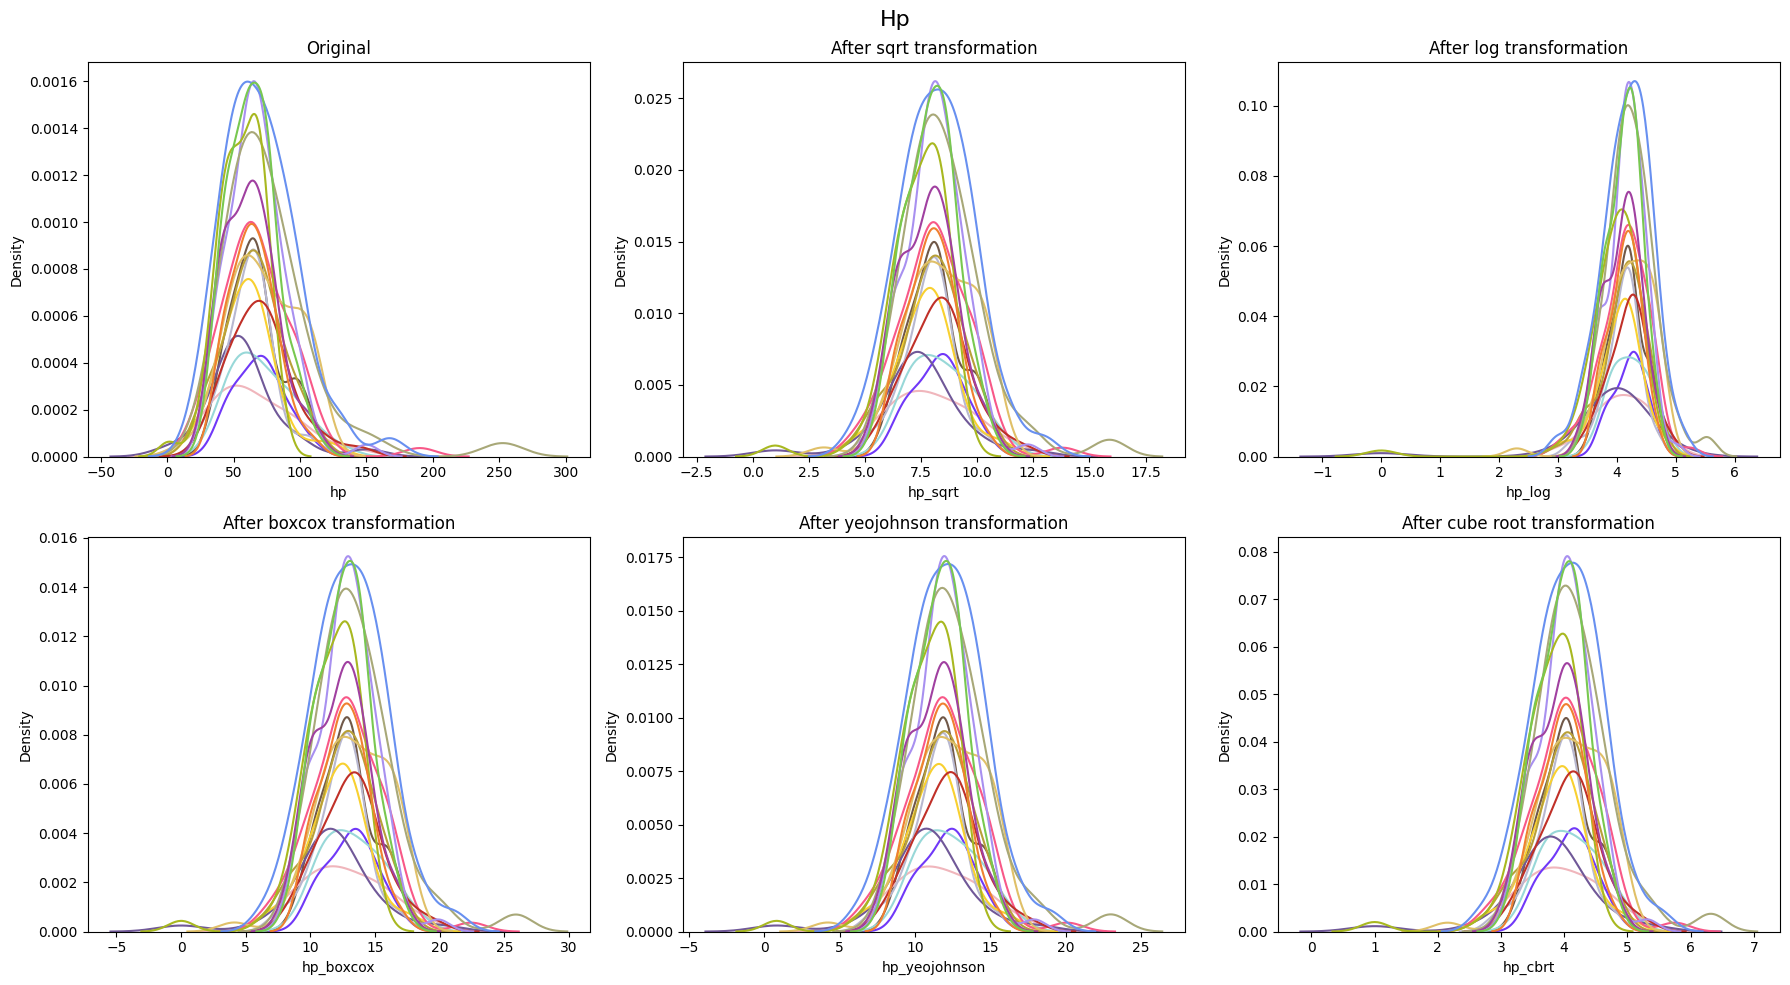

In [84]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Hp", fontsize=16)
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='hp', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("Original")
sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='hp_sqrt', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("After sqrt transformation")
sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='hp_log', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("After log transformation")
sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='hp_boxcox', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("After boxcox transformation")
sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='hp_yeojohnson', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("After yeojohnson transformation")
sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='hp_cbrt', hue='types', palette=colors_dict, legend=False)
axes[1,2].set_title("After cube root transformation")

save_fig("transform_hp", img_dir)
plt.show()

Saving figure transform_attack


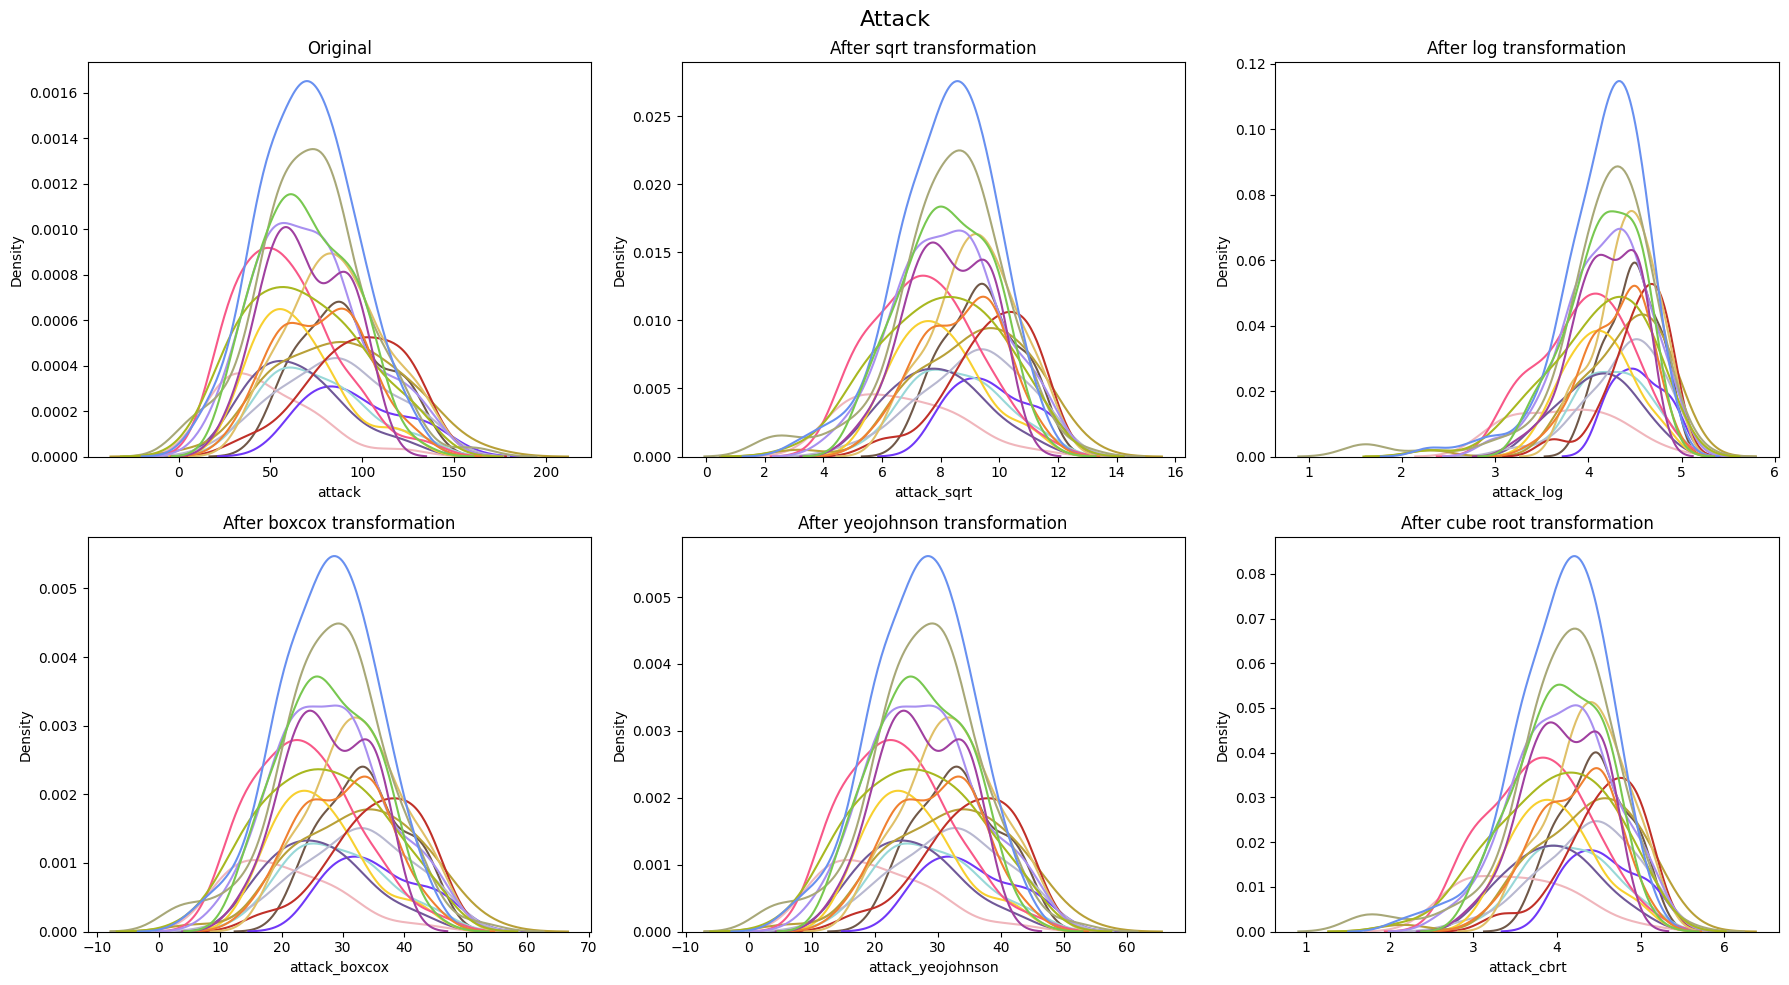

In [85]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Attack", fontsize=16)
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='attack', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("Original")
sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='attack_sqrt', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("After sqrt transformation")
sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='attack_log', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("After log transformation")
sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='attack_boxcox', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("After boxcox transformation")
sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='attack_yeojohnson', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("After yeojohnson transformation")
sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='attack_cbrt', hue='types', palette=colors_dict, legend=False)
axes[1,2].set_title("After cube root transformation")

save_fig("transform_attack", img_dir)
plt.show()


Saving figure transform_defense


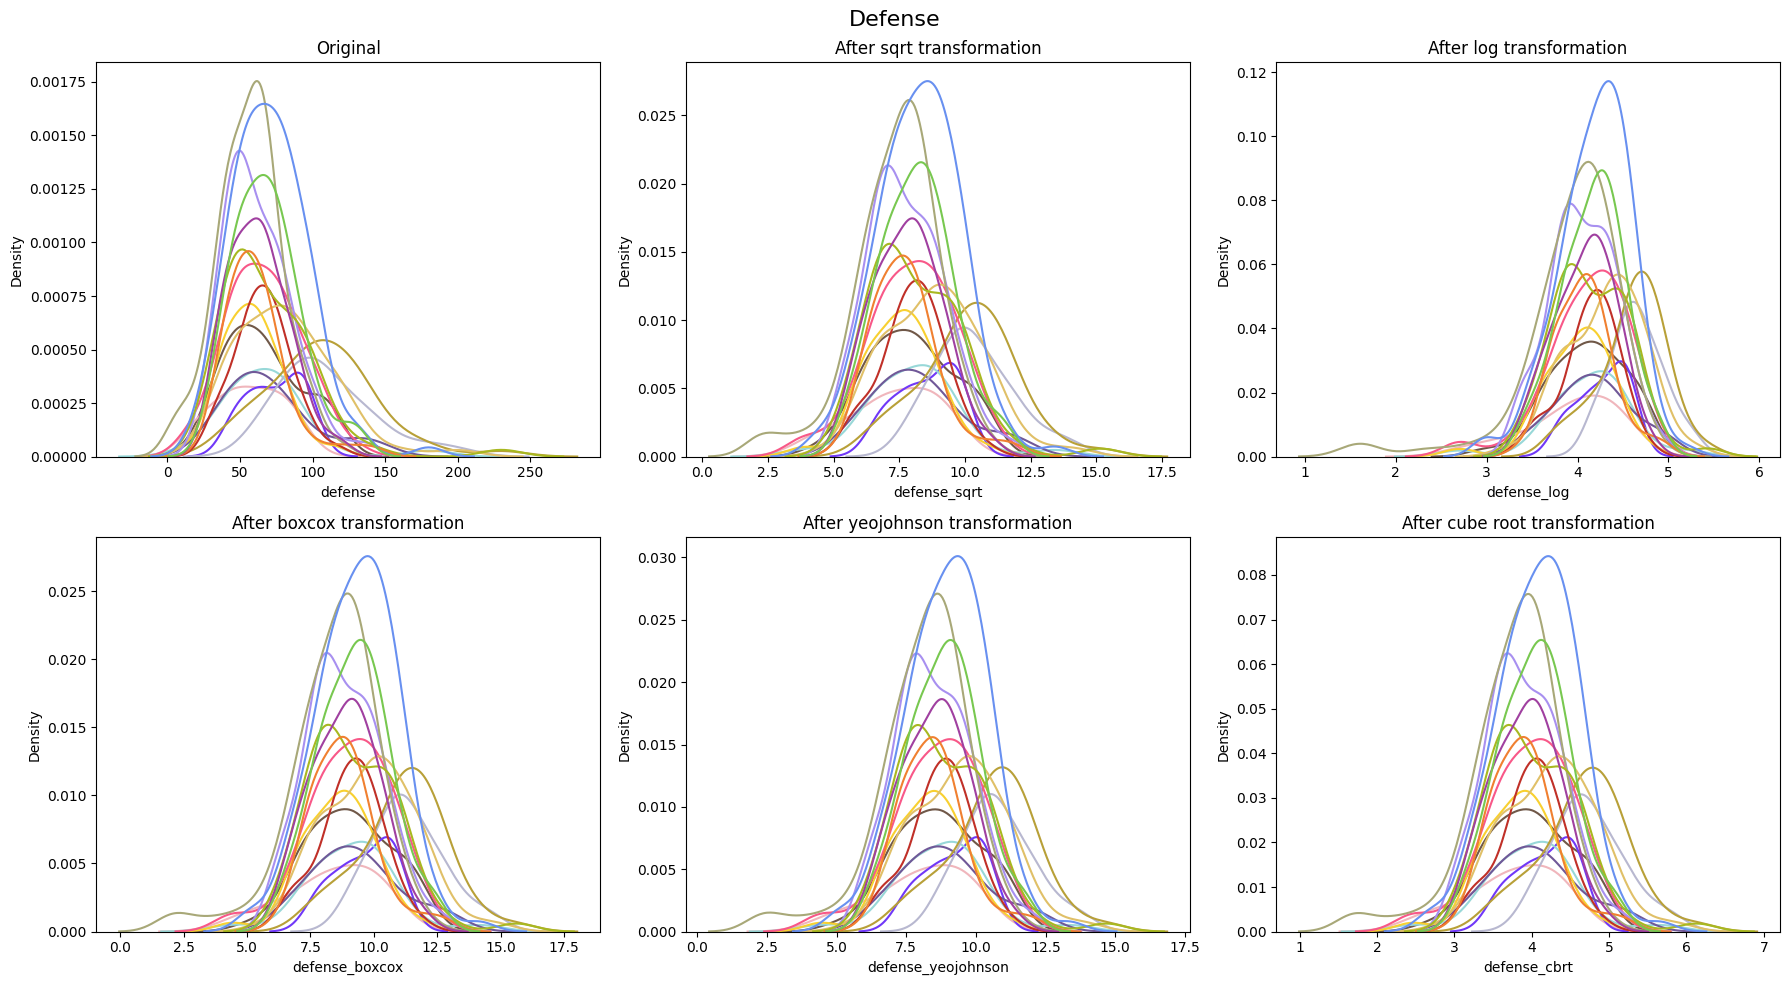

In [86]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Defense", fontsize=16)
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='defense', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("Original")
sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='defense_sqrt', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("After sqrt transformation")
sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='defense_log', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("After log transformation")
sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='defense_boxcox', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("After boxcox transformation")
sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='defense_yeojohnson', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("After yeojohnson transformation")
sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='defense_cbrt', hue='types', palette=colors_dict, legend=False)
axes[1,2].set_title("After cube root transformation")

save_fig("transform_defense", img_dir)
plt.show()

Saving figure transform_special_def


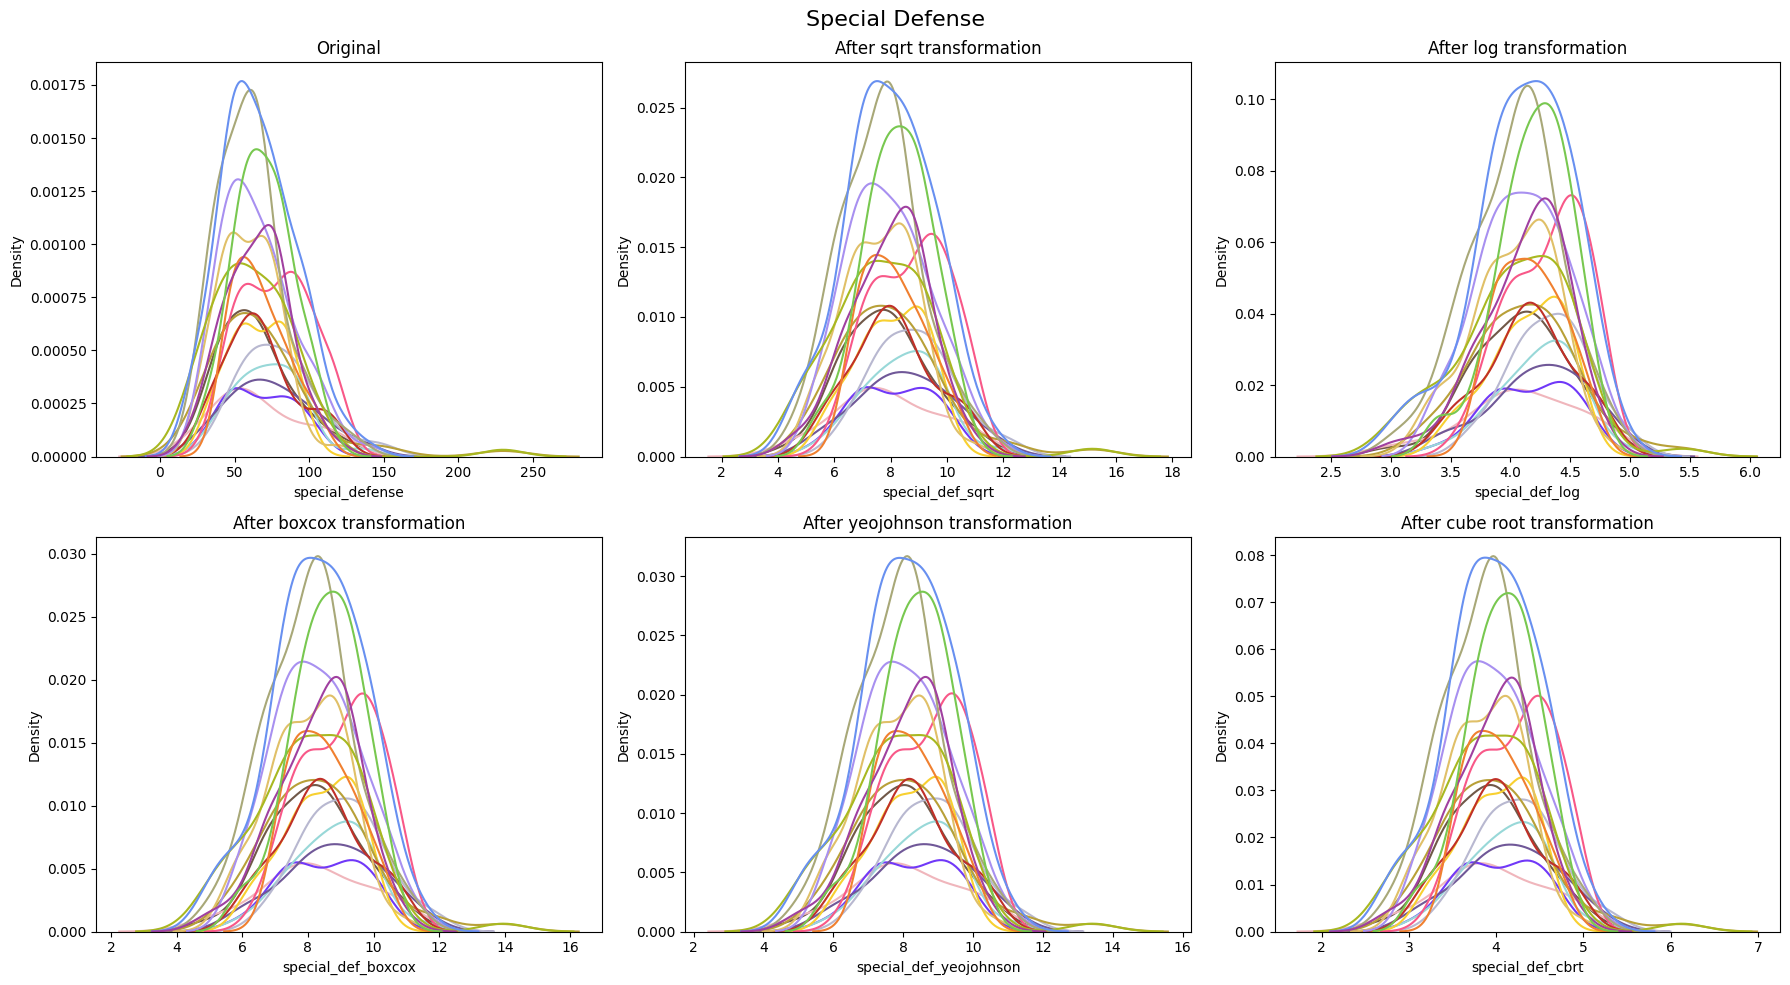

In [87]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Special Defense", fontsize=16)
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='special_defense', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("Original")
sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='special_def_sqrt', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("After sqrt transformation")
sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='special_def_log', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("After log transformation")
sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='special_def_boxcox', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("After boxcox transformation")
sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='special_def_yeojohnson', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("After yeojohnson transformation")
sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='special_def_cbrt', hue='types', palette=colors_dict, legend=False)
axes[1,2].set_title("After cube root transformation")


save_fig("transform_special_def", img_dir)
plt.show()

Saving figure transform_special_att


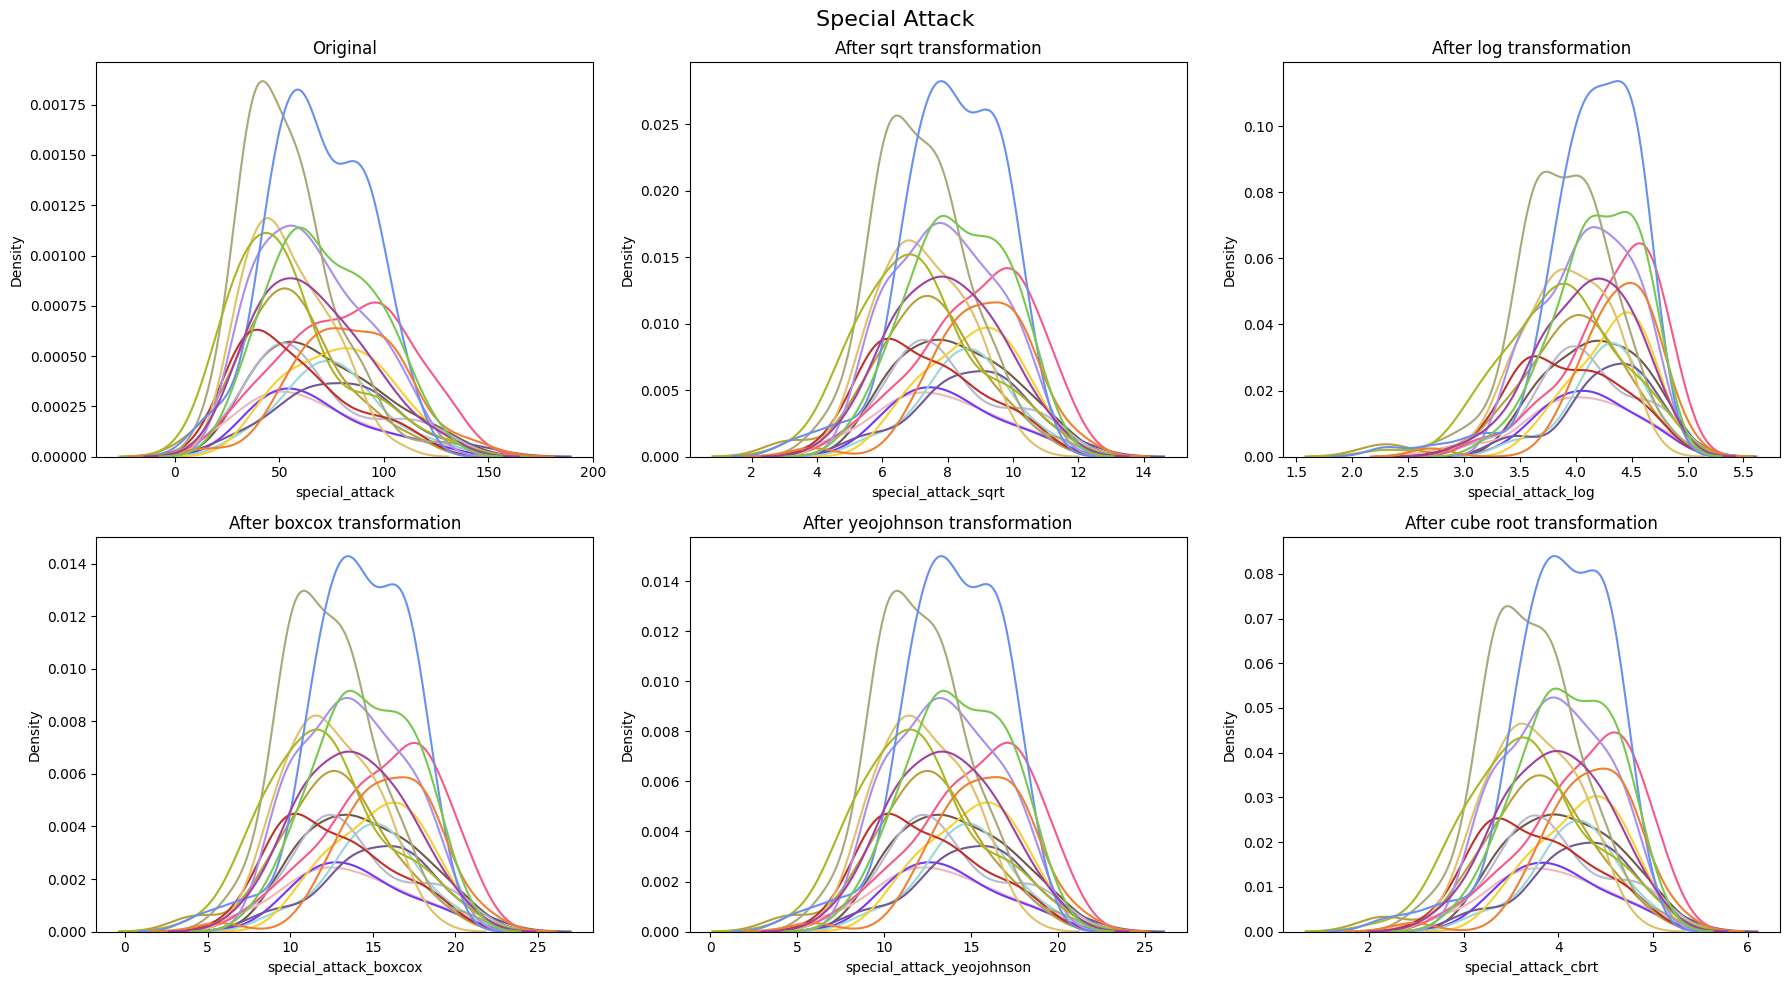

In [40]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Special Attack", fontsize=16)
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='special_attack', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("Original")
sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='special_attack_sqrt', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("After sqrt transformation")
sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='special_attack_log', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("After log transformation")
sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='special_attack_boxcox', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("After boxcox transformation")
sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='special_attack_yeojohnson', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("After yeojohnson transformation")
sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='special_attack_cbrt', hue='types', palette=colors_dict, legend=False)
axes[1,2].set_title("After cube root transformation")

save_fig("transform_special_att", img_dir)
plt.show()

Saving figure transform_speed


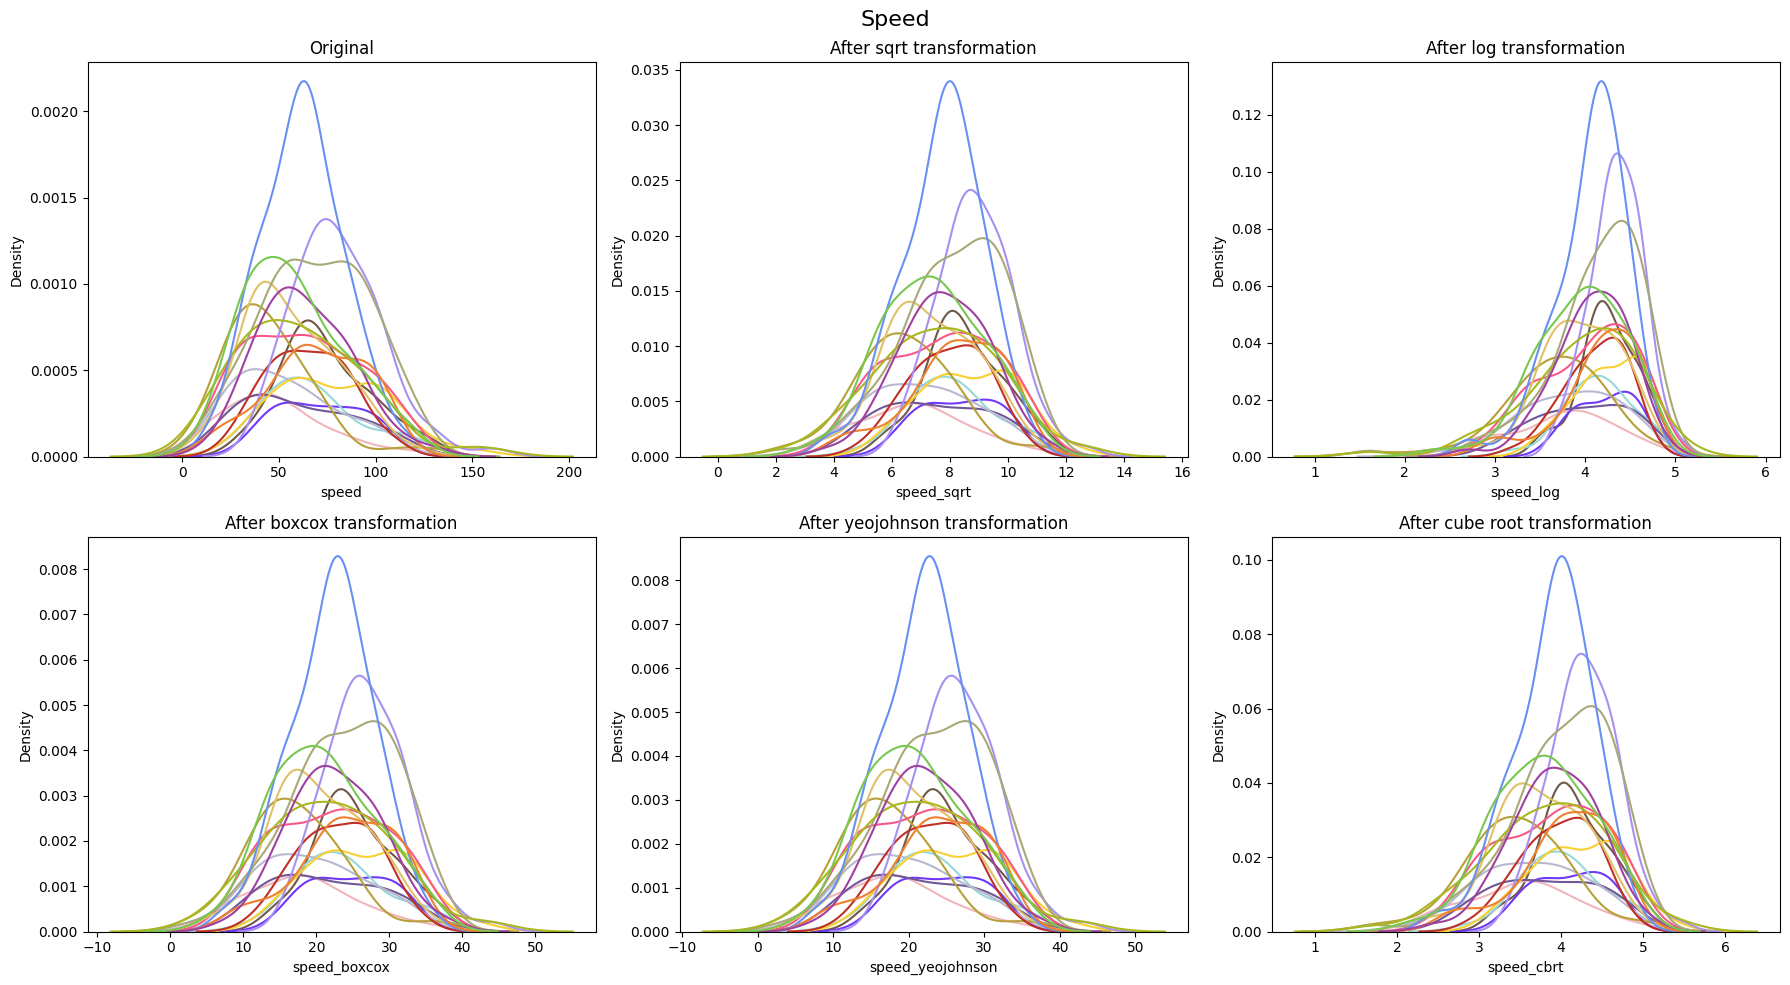

In [42]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Speed", fontsize=16)
sns.kdeplot(ax=axes[0,0], data=df_multi_no_legend, x='speed', hue='types', palette=colors_dict, legend=False)
axes[0,0].set_title("Original")
sns.kdeplot(ax=axes[0,1], data=df_multi_no_legend, x='speed_sqrt', hue='types', palette=colors_dict, legend=False)
axes[0,1].set_title("After sqrt transformation")
sns.kdeplot(ax=axes[0,2], data=df_multi_no_legend, x='speed_log', hue='types', palette=colors_dict, legend=False)
axes[0,2].set_title("After log transformation")
sns.kdeplot(ax=axes[1,0], data=df_multi_no_legend, x='speed_boxcox', hue='types', palette=colors_dict, legend=False)
axes[1,0].set_title("After boxcox transformation")
sns.kdeplot(ax=axes[1,1], data=df_multi_no_legend, x='speed_yeojohnson', hue='types', palette=colors_dict, legend=False)
axes[1,1].set_title("After yeojohnson transformation")
sns.kdeplot(ax=axes[1,2], data=df_multi_no_legend, x='speed_cbrt', hue='types', palette=colors_dict, legend=False)
axes[1,2].set_title("After cube root transformation")

save_fig("transform_speed", img_dir)
plt.show()

Because the number of samples for each type is small (<50), we will use Shapiro-Wilk test instead of Kolmogorov Smirnov. The null and alternative hypothesis are given below
- $H_{0}$: Sample has a gaussian distribution
- $H_{1}$: Sample does not have a gaussian distribution

In [43]:
def check_normality(stat):
    for type_ in type_category:
        x = df_multi_no_legend[df_multi_no_legend['types'] == type_][stat]
        pvalue = stats.shapiro(x).pvalue
        print(f'The p-value for {type_} is {pvalue}')

In [44]:
check_normality("hp")

The p-value for bug is 0.05904171243309975
The p-value for dark is 0.03434931859374046
The p-value for dragon is 0.7914608716964722
The p-value for electric is 0.16956579685211182
The p-value for fairy is 0.4139302968978882
The p-value for fighting is 0.11900365352630615
The p-value for fire is 0.31724727153778076
The p-value for flying is 0.0045856605283916
The p-value for ghost is 0.005197231657803059
The p-value for grass is 0.10859839618206024
The p-value for ground is 0.08228259533643723
The p-value for ice is 0.2270573079586029
The p-value for normal is 1.6977606820400837e-10
The p-value for poison is 0.06208778917789459
The p-value for psychic is 0.00021642389765474945
The p-value for rock is 0.8744630813598633
The p-value for steel is 0.3351007401943207
The p-value for water is 0.0008387300185859203


In [45]:
check_normality("hp_boxcox")

The p-value for bug is 1.31174147099955e-06
The p-value for dark is 0.15998110175132751
The p-value for dragon is 0.8637964129447937
The p-value for electric is 0.7213829755783081
The p-value for fairy is 0.989037036895752
The p-value for fighting is 0.8690925240516663
The p-value for fire is 0.6076049208641052
The p-value for flying is 0.18797412514686584
The p-value for ghost is 0.0043287393637001514
The p-value for grass is 0.34842124581336975
The p-value for ground is 0.013760135509073734
The p-value for ice is 0.630057692527771
The p-value for normal is 4.068760063091759e-06
The p-value for poison is 0.2589482367038727
The p-value for psychic is 0.12010571360588074
The p-value for rock is 0.5302888751029968
The p-value for steel is 0.342151939868927
The p-value for water is 0.5884858965873718


In [46]:
check_normality("hp_yeojohnson")

The p-value for bug is 1.6464408645333606e-06
The p-value for dark is 0.16706162691116333
The p-value for dragon is 0.862221896648407
The p-value for electric is 0.7215457558631897
The p-value for fairy is 0.9910148978233337
The p-value for fighting is 0.8880320191383362
The p-value for fire is 0.6106139421463013
The p-value for flying is 0.20165970921516418
The p-value for ghost is 0.005000090226531029
The p-value for grass is 0.34940609335899353
The p-value for ground is 0.011796021834015846
The p-value for ice is 0.6449436545372009
The p-value for normal is 6.746156486769905e-06
The p-value for poison is 0.26301309466362
The p-value for psychic is 0.13895833492279053
The p-value for rock is 0.4935343265533447
The p-value for steel is 0.32893553376197815
The p-value for water is 0.6379159688949585


In [47]:
check_normality("hp_sqrt")

The p-value for bug is 3.695472287290613e-06
The p-value for dark is 0.14836294949054718
The p-value for dragon is 0.8650709390640259
The p-value for electric is 0.7194358110427856
The p-value for fairy is 0.98362135887146
The p-value for fighting is 0.8336158394813538
The p-value for fire is 0.6002140045166016
The p-value for flying is 0.16618262231349945
The p-value for ghost is 0.0070259147323668
The p-value for grass is 0.342679888010025
The p-value for ground is 0.018741950392723083
The p-value for ice is 0.6043967008590698
The p-value for normal is 1.963480599442846e-06
The p-value for poison is 0.24945098161697388
The p-value for psychic is 0.09393083304166794
The p-value for rock is 0.5906893014907837
The p-value for steel is 0.36467447876930237
The p-value for water is 0.49924638867378235


In [48]:
check_normality("hp_log")

The p-value for bug is 1.3703612897209005e-12
The p-value for dark is 0.27342918515205383
The p-value for dragon is 0.7666521072387695
The p-value for electric is 0.2110385000705719
The p-value for fairy is 0.9618867039680481
The p-value for fighting is 0.9365471601486206
The p-value for fire is 0.5088285803794861
The p-value for flying is 0.19196508824825287
The p-value for ghost is 3.5431332889857003e-07
The p-value for grass is 0.19994767010211945
The p-value for ground is 2.0909403247060254e-05
The p-value for ice is 0.8131300806999207
The p-value for normal is 0.02532859519124031
The p-value for poison is 0.20245318114757538
The p-value for psychic is 0.13833606243133545
The p-value for rock is 0.0324811190366745
The p-value for steel is 0.05951322987675667
The p-value for water is 0.24292509257793427


Unfortunately, the variable HP fails the normality test for all transformations (p-value < 0.05 for some types). We have to use non-parametric tests

### 3. Observations in each sample have same variance
- We can use the Levene's/Bartlett's test to test the equality of variances between groups. $H_{0}$: Variance is homogenous. $H_{1}$: Variance is not homogeneous
- Earlier from the distribution plot, we see that hp, defense, special defense and speed are right skewed. As such, we expect their variance to not be homogeneous. We can transform them to make the distribution more normal.

In [49]:
hp_dict = dict()
attack_dict = dict()
def_dict = dict()
special_attack_dict = dict()
special_def_dict = dict()
speed_dict = dict()

In [50]:
def distribution(hp_type, attack_type, def_type, special_attack_type, special_def_type, speed_type):

    for type_ in type_category:
        hp_dict[type_] = df_multi_no_legend[df_multi_no_legend["types"] == type_][hp_type].tolist()
        attack_dict[type_] = df_multi_no_legend[df_multi_no_legend["types"] == type_][attack_type].tolist()
        def_dict[type_] = df_multi_no_legend[df_multi_no_legend["types"] == type_][def_type].tolist()
        special_attack_dict[type_] = df_multi_no_legend[df_multi_no_legend["types"] == type_][special_attack_type].tolist()
        special_def_dict[type_] = df_multi_no_legend[df_multi_no_legend["types"] == type_][special_def_type].tolist()
        speed_dict[type_] = df_multi_no_legend[df_multi_no_legend["types"] == type_][speed_type].tolist()

In [51]:
# using boxcox transformation for hp, def, special_def and speed
distribution("hp_boxcox", "attack", "defense_boxcox", "special_attack", "special_def_boxcox", "speed_boxcox")

In [52]:
def levene_pvalue(dict_type):
    stat, p_value = stats.levene(dict_type['bug'], dict_type['dark'], dict_type['dragon'], dict_type['electric'],
                                dict_type['fairy'], dict_type['fighting'], dict_type['fire'], dict_type['flying'],
                                dict_type['ghost'], dict_type['grass'], dict_type['ground'], dict_type['ice'],
                                dict_type['normal'], dict_type['poison'], dict_type['psychic'], dict_type['rock'],
                                dict_type['steel'], dict_type['water'])
    return p_value

In [53]:
def bartlett_pvalue(dict_type):
    stat, p_value = stats.bartlett(dict_type['bug'], dict_type['dark'], dict_type['dragon'], dict_type['electric'],
                                dict_type['fairy'], dict_type['fighting'], dict_type['fire'], dict_type['flying'],
                                dict_type['ghost'], dict_type['grass'], dict_type['ground'], dict_type['ice'],
                                dict_type['normal'], dict_type['poison'], dict_type['psychic'], dict_type['rock'],
                                dict_type['steel'], dict_type['water'])
    return p_value

In [54]:
print(f"Levene pvalue: {levene_pvalue(hp_dict)}")
print(f"Bartlett pvalue: {bartlett_pvalue(hp_dict)}")


Levene pvalue: 0.016160944343310505
Bartlett pvalue: 3.1033655947107734e-06


In [55]:
print(f"Levene pvalue: {levene_pvalue(attack_dict)}")
print(f"Bartlett pvalue: {bartlett_pvalue(attack_dict)}")

Levene pvalue: 0.23291072684158434
Bartlett pvalue: 0.19012077790506815


In [56]:
print(f"Levene pvalue: {levene_pvalue(def_dict)}")
print(f"Bartlett pvalue: {bartlett_pvalue(def_dict)}")

Levene pvalue: 0.36250694331855743
Bartlett pvalue: 0.04703181476038693


In [57]:
print(f"Levene pvalue: {levene_pvalue(special_attack_dict)}")
print(f"Bartlett pvalue: {bartlett_pvalue(special_attack_dict)}")

Levene pvalue: 0.4290004545717112
Bartlett pvalue: 0.3391317579376895


In [58]:
print(f"Levene pvalue: {levene_pvalue(special_def_dict)}")
print(f"Bartlett pvalue: {bartlett_pvalue(special_def_dict)}")

Levene pvalue: 0.1686770318097588
Bartlett pvalue: 0.013008073330831538


In [59]:
print(f"Levene pvalue: {levene_pvalue(speed_dict)}")
print(f"Bartlett pvalue: {bartlett_pvalue(speed_dict)}")

Levene pvalue: 0.005446575554462353
Bartlett pvalue: 0.0215302903708799


Unfortunately, the groups are of unequal variance and we have to resort to non-parametric tests

## Kruskal Wallis Test

- Kruskal Wallis Test is the non-parametric version of ANOVA. It is used to test whether the distributions of two or more independent samples are equal or not
- We will use the non-transformed data

$H_{0}$: distributions of all groups are equal

$H_{1}$: distributions of all groups are unequal

In [60]:
hp_dict = dict()
attack_dict = dict()
def_dict = dict()
special_attack_dict = dict()
special_def_dict = dict()
speed_dict = dict()

In [61]:
distribution("hp", "attack", "defense", "special_attack", "special_defense", "speed")

In [62]:
def kruskal_wallis_pvalue(dict_type):
    stat, p_value = stats.kruskal(dict_type['bug'], dict_type['dark'], dict_type['dragon'], dict_type['electric'],
                                dict_type['fairy'], dict_type['fighting'], dict_type['fire'], dict_type['flying'],
                                dict_type['ghost'], dict_type['grass'], dict_type['ground'], dict_type['ice'],
                                dict_type['normal'], dict_type['poison'], dict_type['psychic'], dict_type['rock'],
                                dict_type['steel'], dict_type['water'])
    return p_value

In [63]:
# for hp
kruskal_wallis_pvalue(hp_dict)

0.004951759889328573

In [64]:
kruskal_wallis_pvalue(attack_dict)

6.487527758217871e-18

In [65]:
kruskal_wallis_pvalue(def_dict)

2.353826976656593e-21

In [66]:
kruskal_wallis_pvalue(special_attack_dict)

2.0259564555281464e-17

In [67]:
kruskal_wallis_pvalue(special_def_dict)

0.0005812718600627403

In [68]:
kruskal_wallis_pvalue(speed_dict)

6.572869075462367e-14

As expected, since p-value < 0.05, we reject $H_{0}$ and conclude that the distributions of some groups are unequal at the 5% level of significance

We need to run a posterior analysis (post-hoc) test and compare pairwise group differences to determine which groups are different. We will run the Dunn's Test

$H_{0}$: All means are the same $\mu_{i} = \mu_{j}$   
$H_{1}$: All means are not the same $\mu_{i} \neq \mu_{j}$

In [88]:
def dunn_test(val_col):
    pc = sp.posthoc_dunn(df_multi_no_legend, val_col=val_col, group_col='types', p_adjust='holm')
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.9, 0.35, 0.04, 0.3]}

    fig = plt.figure(figsize=(10, 8))
    sp.sign_plot(pc, **heatmap_args)

    figure_name = f"{val_col}_dunn_test"
    save_fig(figure_name, img_dir)

In [89]:
def conover_test(val_col):
    pc = sp.posthoc_conover(df_multi_no_legend, val_col=val_col, group_col='types', p_adjust='holm')
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.9, 0.35, 0.04, 0.3]}

    fig = plt.figure(figsize=(10, 8))
    sp.sign_plot(pc, **heatmap_args)

    figure_name = f"{val_col}_conover_test"
    save_fig(figure_name, img_dir)

Saving figure hp_dunn_test


c:\Users\Joanna\Desktop\Projects\Pokemon Project\script\src\utils.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


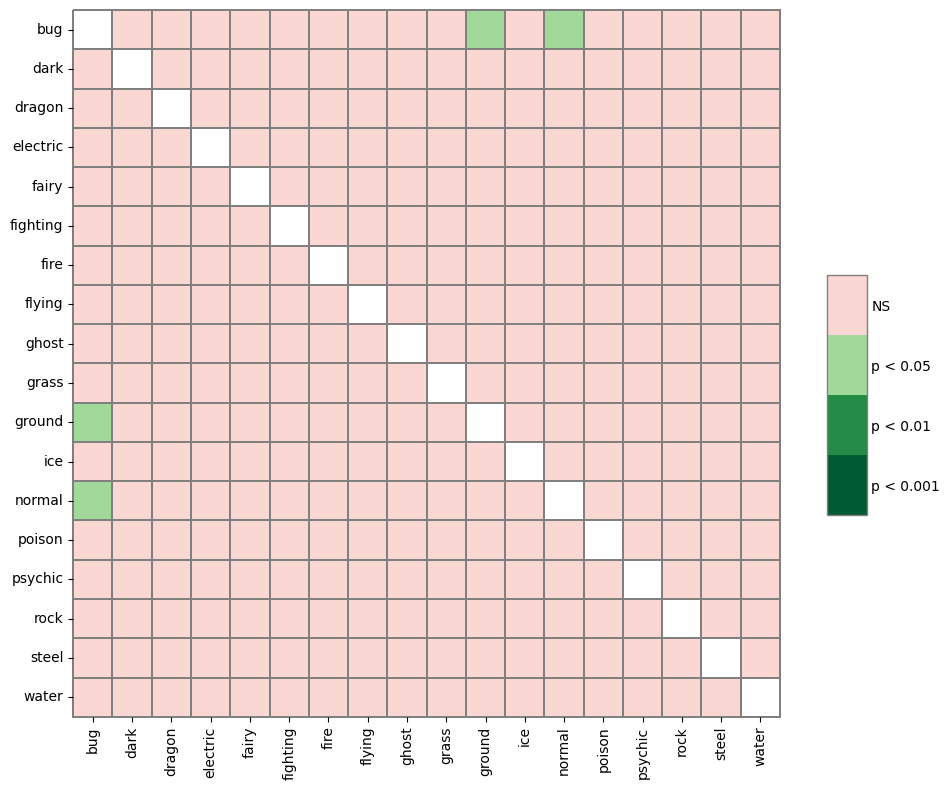

In [90]:
dunn_test('hp')

Saving figure attack_dunn_test


c:\Users\Joanna\Desktop\Projects\Pokemon Project\script\src\utils.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


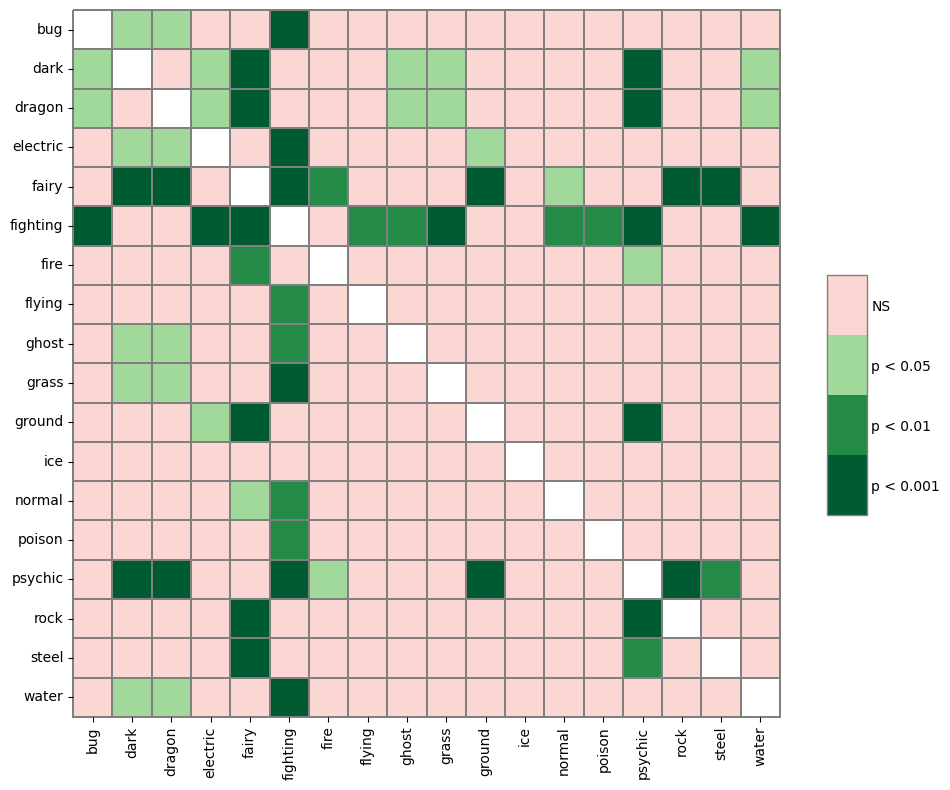

In [91]:
dunn_test('attack')

Saving figure defense_dunn_test


c:\Users\Joanna\Desktop\Projects\Pokemon Project\script\src\utils.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


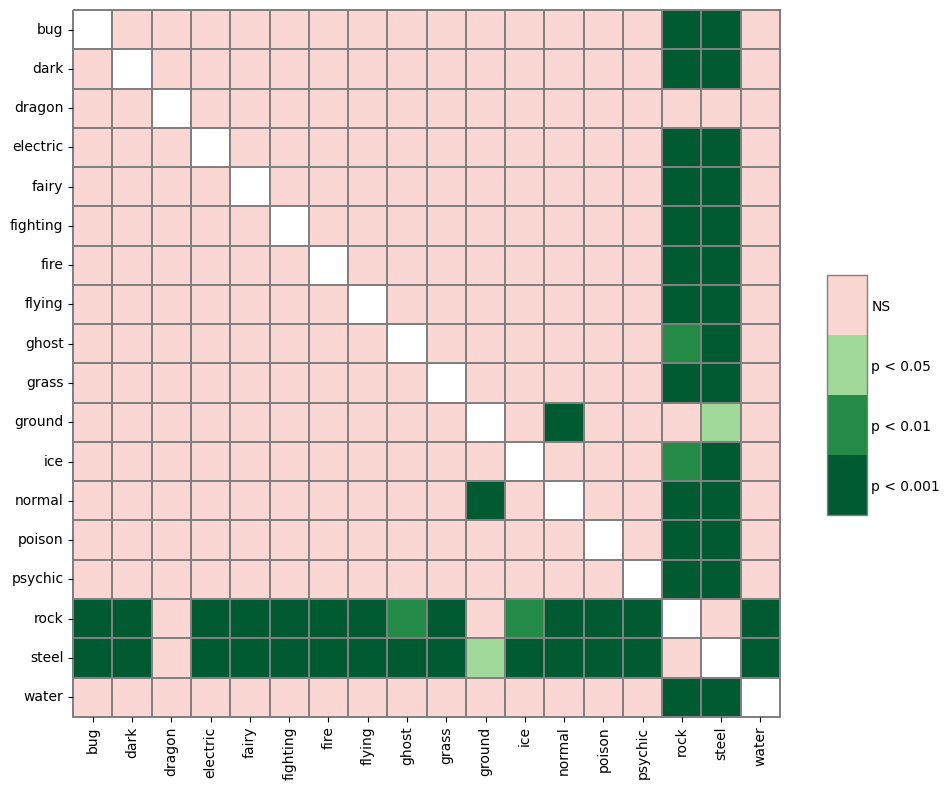

In [92]:
dunn_test('defense')

Saving figure special_defense_dunn_test


c:\Users\Joanna\Desktop\Projects\Pokemon Project\script\src\utils.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


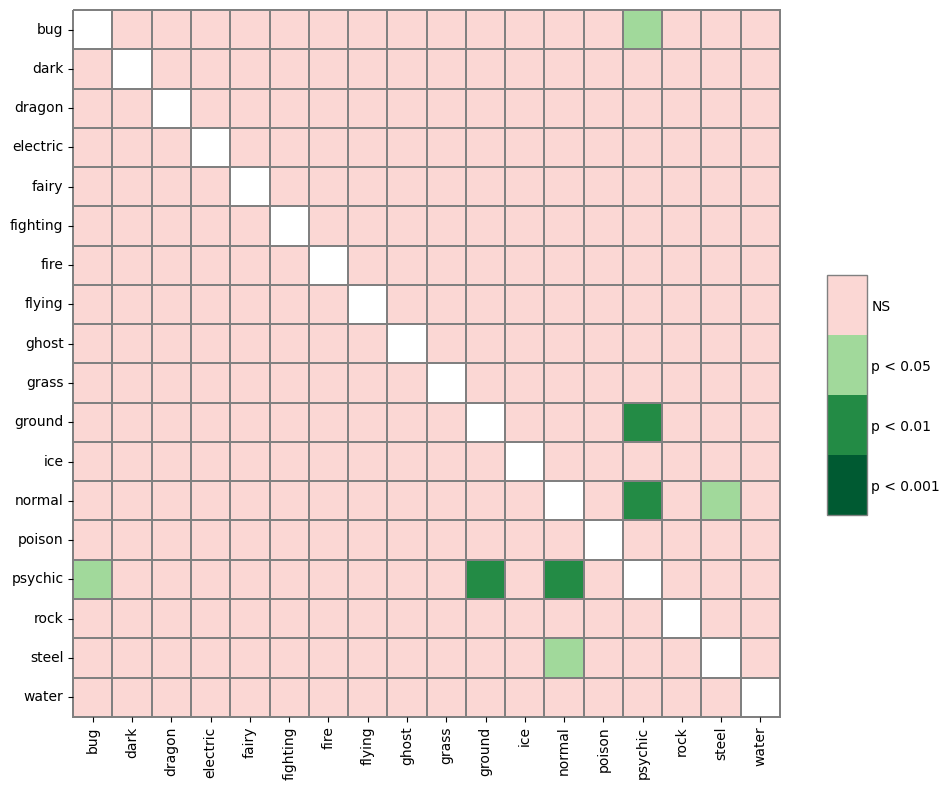

In [93]:
dunn_test('special_defense')

Saving figure special_attack_dunn_test


c:\Users\Joanna\Desktop\Projects\Pokemon Project\script\src\utils.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


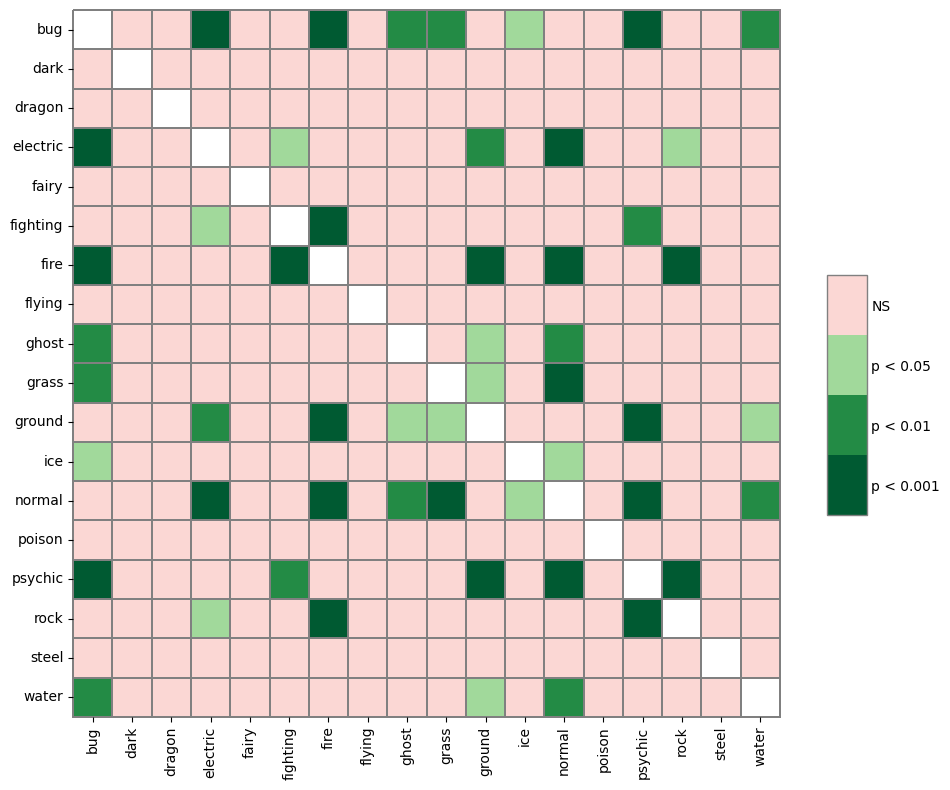

In [94]:
dunn_test('special_attack')

Saving figure speed_dunn_test


c:\Users\Joanna\Desktop\Projects\Pokemon Project\script\src\utils.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


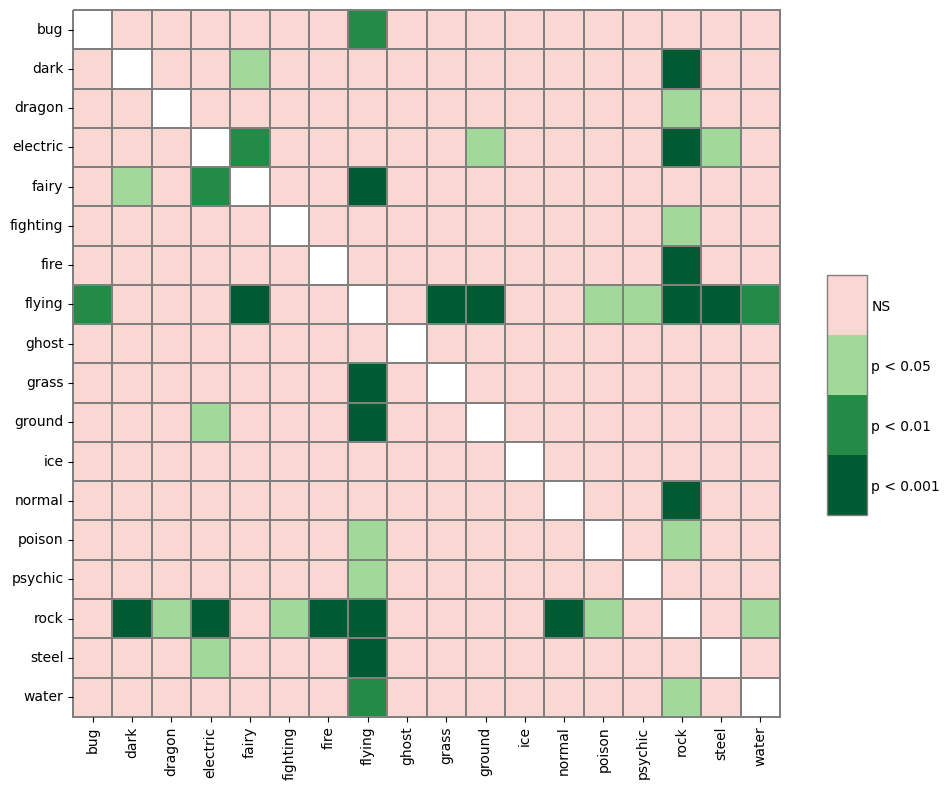

In [95]:
dunn_test('speed')